In [1]:
from morphi_lab.av import AV
from morphi_lab.segmenter import Segmenter
from morphi_lab.depther import DepthEstimator
import os
cwd = os.getcwd()
parent_dir = os.path.dirname(cwd)

%load_ext autoreload
%autoreload 2

/Users/wattjer/Desktop/morphi_lab/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution1.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


# 0.  load in test image

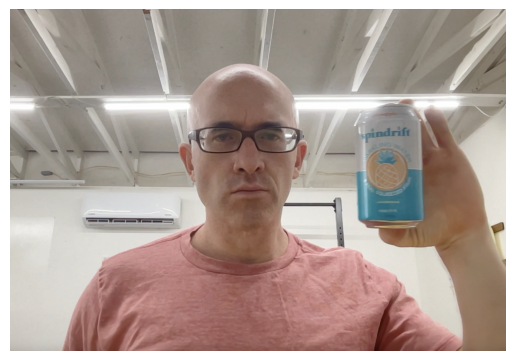

In [2]:
img_path = parent_dir + "/test_data/test_input/test_can.png"
av = AV(img_path)
av.show_result()

# 1. detection + segmentation

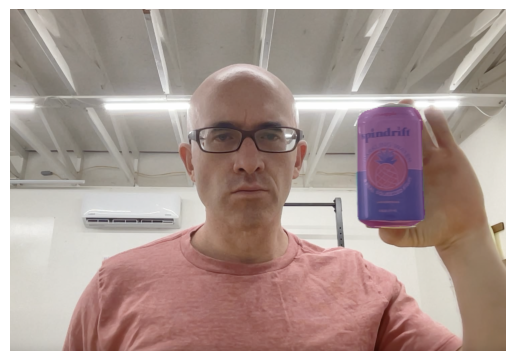

In [3]:
# detect and segment
segmenter = Segmenter()
segmenter.read_img_path(img_path)
segmenter.segment()
segmenter.project_segmentations()
segmenter.show_result()

# 2. Depth

## image

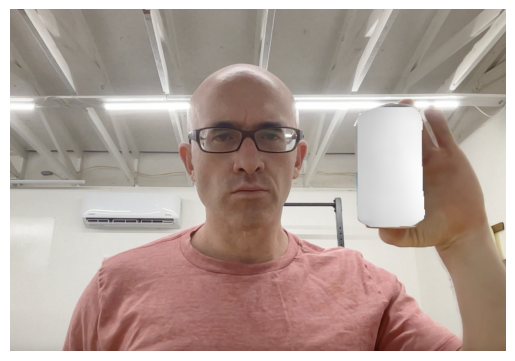

In [4]:
# detect and segment
segmenter = Segmenter()
segmenter.read_img_path(img_path)
segmenter.segment()

# compute depth of segmentation
depth = DepthEstimator(segmenter)
depth.compute_depth()
depth.replace_segmentation_with_depth()
depth.show_result()

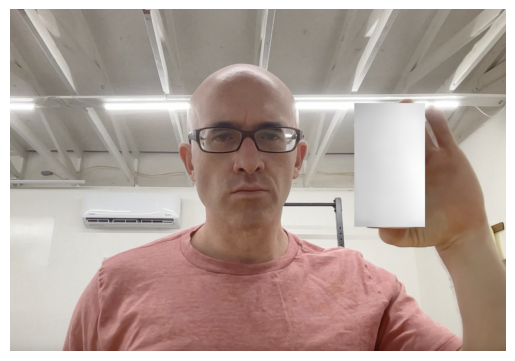

In [5]:
# detect and segment
segmenter = Segmenter()
segmenter.read_img_path(img_path)
segmenter.segment()

# 
depth = DepthEstimator(segmenter)
depth.compute_depth()
depth.replace_detection_window_with_depth()
depth.show_result()